The provided code performs sentiment analysis on a dataset of headlines to detect sarcasm. It builds and trains a neural network model using TensorFlow and Keras.



### In-Depth Explanation for Beginners

Imagine you want to teach a computer to understand if a sentence is sarcastic or not. Computers don't understand words like humans do; they only understand numbers. This program is essentially teaching a computer to tell the difference between sarcastic and non-sarcastic headlines.

Here's a breakdown of the process:

**1. Getting and Preparing the Data (The "Learning Material")**

  * **Downloading the Sarcasm Dataset:** We start by downloading a file named `sarcasm.json`. This file contains thousands of headlines, and for each headline, it tells us whether it's sarcastic (`1`) or not (`0`). This is our "learning material" for the computer.
  * **Separating Headlines and Labels:** We read this file and put all the headlines into one list (`sentences`) and their corresponding sarcasm labels into another list (`labels`).
  * **Splitting into Training and Testing:** We then divide our data into two parts:
      * **Training Data:** The larger portion (20,000 headlines in this case) is what the computer will "study" to learn the patterns of sarcasm.
      * **Testing Data:** A smaller, separate portion is kept aside. This data is **brand new** to the computer, and we'll use it to check how well our computer learned and if it can correctly identify sarcasm in headlines it has never seen before.

**2. Converting Words to Numbers (The "Language Translator")**

  * **The Problem:** Computers can't directly process text like "granny starting to fear spiders." They need numbers.
  * **Tokenizer:** We use something called a `Tokenizer`. Think of it as a dictionary builder. It goes through all the words in our *training headlines* and assigns a unique number to each word. For example, "granny" might become 10, "spiders" might become 25, and so on.
  * **Handling Unknown Words (`<OOV>`):** What if a word appears in our *testing headlines* that wasn't in our *training headlines*? The tokenizer assigns a special number (`<OOV>`, which stands for "Out Of Vocabulary") to such words.
  * **Creating Sequences:** Each headline is then converted into a sequence of these numbers. So, "granny starting to fear spiders" might become `[10, 15, 2, 30, 25]`.
  * **Padding and Truncating:** Different headlines have different lengths. Our computer model needs all input sequences to be the same length (in this case, `max_length = 100`).
      * **Padding:** If a headline is too short (e.g., only 5 words), we add zeros to the end of its numerical sequence until it reaches 100 numbers.
      * **Truncating:** If a headline is too long (e.g., 150 words), we cut off the extra words from the end until it's 100 numbers long. This ensures all our "sentences" are the same size for the computer.

**3. Building the Brain (The Neural Network Model)**

This is where the magic happens\! We're building a "neural network," which is a simplified model of how the human brain works, designed to learn from data.

  * **Sequential Model:** We're building a `Sequential` model, meaning the information flows in one direction, from one layer to the next.
  * **Embedding Layer (The "Word Meaning" Layer):**
      * When we convert words to numbers, "granny" (10) and "cat" (12) are just numbers; the computer doesn't know they are different types of words or how they relate to other words.
      * The `Embedding` layer is crucial. It learns to represent each word as a small, dense vector of numbers (16 numbers in this case, `embedding_dim`). Words with similar meanings or contexts will have similar-looking embedding vectors. This helps the model understand the nuances of language. It's like giving each word a rich "profile" of its meaning.
  * **Global Average Pooling 1D (The "Sentence Summary" Layer):**
      * After the embedding layer, each headline is a sequence of 16-number vectors. This layer takes all these vectors for a given sentence and averages them. This creates a single, concise summary vector for the entire headline. It's like getting the "gist" of the sentence.
  * **Dense Layers (The "Decision-Making" Layers):**
      * These are standard neural network layers. They take the summarized sentence vector and perform calculations to identify patterns.
      * The first `Dense` layer has 24 "neurons" (like mini-calculators) and uses a `relu` (Rectified Linear Unit) activation function. `relu` introduces non-linearity, which allows the model to learn more complex relationships in the data.
      * The final `Dense` layer has only 1 neuron and uses a `sigmoid` activation function. `sigmoid` squashes the output to a value between 0 and 1. This output represents the **probability** that the headline is sarcastic. A value close to 1 means "very likely sarcastic," and close to 0 means "very likely not sarcastic."
  * **Compile the Model:**
      * `loss='binary_crossentropy'`: This tells the model how to measure its mistakes. For sarcasm (binary: yes/no), `binary_crossentropy` is a good choice. The goal is to minimize this "loss."
      * `optimizer='adam'`: This is the "learning strategy" the model uses to adjust its internal settings (weights) to reduce the loss. Adam is a popular and effective optimizer.
      * `metrics=['accuracy']`: This tells the model to also report `accuracy` during training, which is easier for us humans to understand (percentage of correct predictions).

**4. Training the Model (The "Learning Phase")**

  * `model.fit()`: This is where the model "learns."
      * It repeatedly goes through the `training_padded` headlines and `training_labels`.
      * For each headline, it makes a prediction, compares it to the actual label (sarcastic/not sarcastic), calculates the `loss`, and then uses the `optimizer` (`adam`) to subtly adjust its internal weights to make better predictions next time.
      * `epochs=30`: This means the model will go through the entire training dataset 30 times. Each pass is an "epoch."
      * `validation_data`: While training, we also tell the model to test itself on the `testing_padded` data (which it hasn't seen during training). This is crucial to see if the model is truly learning general patterns or just memorizing the training data. If the performance on training data keeps improving but on validation data gets worse, it's "overfitting" (memorizing instead of learning).

**5. Evaluating the Model (Checking the "Learning Progress")**

  * **Plotting Graphs:** We use `matplotlib` to draw graphs of `accuracy` and `loss` over the 30 epochs.
      * **Accuracy Graph:** We want to see both training and validation accuracy increase over time. Ideally, they should increase together, indicating good learning.
      * **Loss Graph:** We want to see both training and validation loss decrease over time.
      * These plots help us understand if the model is learning effectively and if there are signs of overfitting.

**6. Understanding the Learned Information (The "Brain's Knowledge")**

  * **Decoding Sentences:** We create a `reverse_word_index` to convert the numbers back to words, allowing us to see what the model actually processed.
  * **Examining Embeddings:** The `Embedding` layer is fascinating. The `weights` in this layer are the learned word embeddings. Each row in `weights` corresponds to a word in our vocabulary, and the numbers in that row are the word's "meaning vector." These vectors are what the model uses to understand the relationships between words. Tools like TensorFlow's Embedding Projector can visualize these vectors, showing words with similar meanings clustered together.
  * **Saving Embeddings:** The code saves these word embeddings to `vecs.tsv` and the corresponding words to `meta.tsv`. These files are specifically formatted to be uploaded to the Embedding Projector for visual exploration.

**7. Making Predictions (Putting the "Learning" to Use)**

  * Finally, we provide new, unseen sentences to the trained model.
  * These sentences go through the same tokenization and padding steps.
  * `model.predict(padded)`: The model then processes these numerical sequences and outputs a probability (a number between 0 and 1) for each sentence, indicating how likely it believes the sentence is sarcastic.

In essence, this program takes raw text, converts it into a numerical language the computer can understand, builds a "brain" (neural network) to learn patterns from sarcastic and non-sarcastic examples, and then uses that learned knowledge to predict sarcasm in new text.

## Let's break down the code section by section with comments, and then I'll provide an in-depth explanation for beginners.

In [8]:
# Cell 1: Setup and Imports

# The %tensorflow_version magic command is specific to Google Colab.
# If you are running this in a local Jupyter Notebook or VS Code,
# you can comment out or remove the try-except block below,
# provided you have TensorFlow 2.x already installed in your environment.
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np # Import numpy here as it's used later for array conversion
import matplotlib.pyplot as plt # Import matplotlib here for plotting
import io # Import io here for file operations related to embeddings

In [9]:
# Cell 2: Define Hyperparameters

vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [10]:
# Cell 3: Download and Load Data (Modified for Windows/curl)

# Use curl instead of wget for Windows compatibility
# Make sure to adjust the output path if you don't want it in the current directory
get_ipython().system('curl -o sarcasm.json https://storage.googleapis.com/learning-datasets/sarcasm.json')

# Load the dataset
with open("sarcasm.json", 'r') as f: # Open directly from current directory
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

print(f"Total sentences: {len(sentences)}")
print(f"Total labels: {len(labels)}")
print(f"Example sentence: '{sentences[0]}', label: {labels[0]}")

Total sentences: 26709
Total labels: 26709
Example sentence: 'former versace store clerk sues over secret 'black code' for minority shoppers', label: 0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  6 5511k    6  372k    0     0   703k      0  0:00:07 --:--:--  0:00:07  710k
100 5511k  100 5511k    0     0  4794k      0  0:00:01  0:00:01 --:--:-- 4817k


In [11]:
# Cell 4: Split Data into Training and Testing Sets

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

print(f"Training sentences count: {len(training_sentences)}")
print(f"Testing sentences count: {len(testing_sentences)}")

Training sentences count: 20000
Testing sentences count: 6709


In [12]:
# Cell 5: Tokenization and Padding

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
print(f"Number of words in vocabulary (including OOV): {len(word_index)}")
# print(f"Sample word_index: {list(word_index.items())[:10]}") # Uncomment to see some word-index pairs

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert lists to NumPy arrays for TensorFlow
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

print(f"Shape of training_padded: {training_padded.shape}")
print(f"Shape of training_labels: {training_labels.shape}")
print(f"Shape of testing_padded: {testing_padded.shape}")
print(f"Shape of testing_labels: {testing_labels.shape}")
print(f"Example of padded sequence for first training sentence: {training_padded[0][:20]}...") # Show first 20 elements

Number of words in vocabulary (including OOV): 25637
Shape of training_padded: (20000, 100)
Shape of training_labels: (20000,)
Shape of testing_padded: (6709, 100)
Shape of testing_labels: (6709,)
Example of padded sequence for first training sentence: [ 328    1  799 3405 2404   47  389 2214    1    6 2614 8863    0    0
    0    0    0    0    0    0]...


In [13]:
# Cell 6: Build the Model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\AsadMunir\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
# Cell 7: Model Summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Cell 8: Train the Model

num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - 6ms/step - accuracy: 0.5669 - loss: 0.6775 - val_accuracy: 0.6728 - val_loss: 0.6440
Epoch 2/30
625/625 - 2s - 3ms/step - accuracy: 0.7381 - loss: 0.5363 - val_accuracy: 0.8164 - val_loss: 0.4508
Epoch 3/30
625/625 - 2s - 3ms/step - accuracy: 0.8196 - loss: 0.4113 - val_accuracy: 0.7098 - val_loss: 0.5624
Epoch 4/30
625/625 - 2s - 3ms/step - accuracy: 0.8486 - loss: 0.3559 - val_accuracy: 0.8313 - val_loss: 0.3818
Epoch 5/30
625/625 - 2s - 3ms/step - accuracy: 0.8648 - loss: 0.3232 - val_accuracy: 0.8495 - val_loss: 0.3582
Epoch 6/30
625/625 - 2s - 3ms/step - accuracy: 0.8855 - loss: 0.2843 - val_accuracy: 0.8542 - val_loss: 0.3492
Epoch 7/30
625/625 - 2s - 3ms/step - accuracy: 0.8911 - loss: 0.2663 - val_accuracy: 0.8566 - val_loss: 0.3441
Epoch 8/30
625/625 - 2s - 3ms/step - accuracy: 0.9014 - loss: 0.2441 - val_accuracy: 0.8542 - val_loss: 0.3459
Epoch 9/30
625/625 - 2s - 3ms/step - accuracy: 0.8996 - loss: 0.2463 - val_accuracy: 0.8353 - val_loss: 0.3770
E

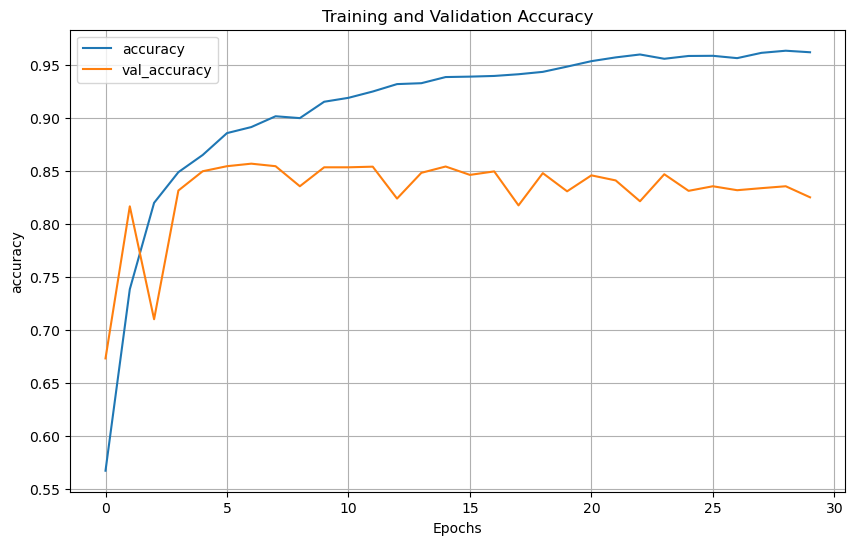

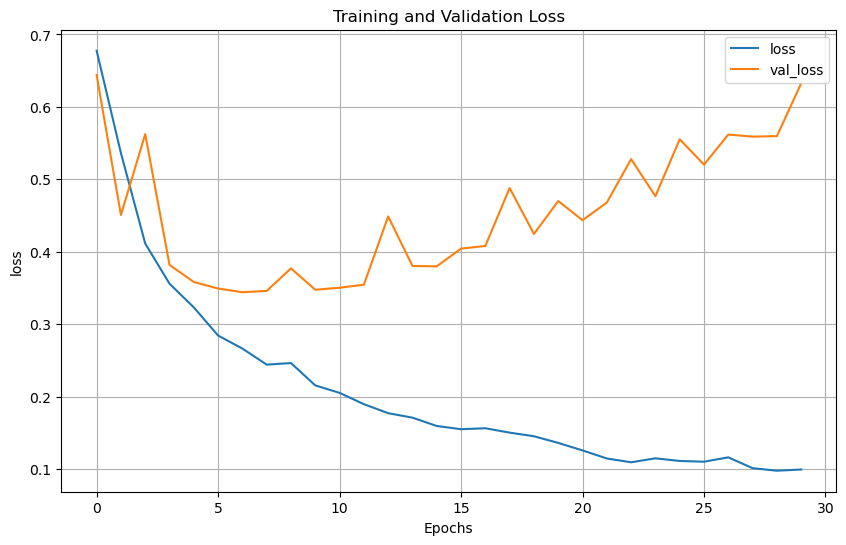

In [16]:
# Cell 9: Plot Training History

def plot_graphs(history, string):
  plt.figure(figsize=(10, 6)) # Make figure a bit larger
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title(f'Training and Validation {string.capitalize()}')
  plt.grid(True) # Add grid for better readability
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [17]:
# Cell 10: Decode Sentences (Utility)

# Create a reverse word index (from index to word)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print("Original training sentence (index 0):")
print(training_sentences[0])
print("\nDecoded padded training sentence (index 0):")
print(decode_sentence(training_padded[0]))
print("\nOriginal training sentence (index 2):")
print(training_sentences[2])
print(f"Original label (index 2): {labels[2]}")

Original training sentence (index 0):
former versace store clerk sues over secret 'black code' for minority shoppers

Decoded padded training sentence (index 0):
former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?

Original training sentence (index 2):
mom starting to fear son's web series closest thing she will have to grandchild
Original label (index 2): 1


In [18]:
# Cell 11: Extract and Save Word Embeddings

e = model.layers[0] # Get the embedding layer
weights = e.get_weights()[0] # Get the learned weights (embeddings)
print(f"Shape of embedding weights: {weights.shape}") # Expected: (vocab_size, embedding_dim)

# Prepare files for TensorFlow Embedding Projector
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size): # Start from 1 as 0 is usually padding
  word = reverse_word_index.get(word_num, "<unknown>") # Use .get with a default for safety
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()

print("\nEmbedding vectors saved to 'vecs.tsv' and metadata to 'meta.tsv'.")
print("You can upload these files to http://projector.tensorflow.org/ to visualize the embeddings.")

Shape of embedding weights: (10000, 16)

Embedding vectors saved to 'vecs.tsv' and metadata to 'meta.tsv'.
You can upload these files to http://projector.tensorflow.org/ to visualize the embeddings.


In [19]:
# Cell 12: Make Predictions on New Sentences

test_sentences = [
    "granny starting to fear spiders in the garden might be real", # Likely sarcastic
    "game of thrones season finale showing this sunday night",      # Not sarcastic
    "this is the most exciting spreadsheet i have ever seen",     # Likely sarcastic
    "the weather today is absolutely perfect for a picnic"        # Not sarcastic
]

sequences = tokenizer.texts_to_sequences(test_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

predictions = model.predict(padded)

print("\nPredictions for new sentences:")
for i, sentence in enumerate(test_sentences):
    # The sigmoid output is a probability. Convert to 0 or 1 for easy interpretation.
    predicted_label = 1 if predictions[i][0] > 0.5 else 0
    sarcasm_status = "sarcastic" if predicted_label == 1 else "not sarcastic"
    print(f"Sentence: '{sentence}'")
    print(f"Predicted probability of sarcasm: {predictions[i][0]:.4f}")
    print(f"Predicted status: {sarcasm_status}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

Predictions for new sentences:
Sentence: 'granny starting to fear spiders in the garden might be real'
Predicted probability of sarcasm: 0.4757
Predicted status: not sarcastic

Sentence: 'game of thrones season finale showing this sunday night'
Predicted probability of sarcasm: 0.0070
Predicted status: not sarcastic

Sentence: 'this is the most exciting spreadsheet i have ever seen'
Predicted probability of sarcasm: 0.0000
Predicted status: not sarcastic

Sentence: 'the weather today is absolutely perfect for a picnic'
Predicted probability of sarcasm: 0.0000
Predicted status: not sarcastic

